In [37]:
With a population of over 15 million, Bangalore is the third largest city in India and 27th largest city in the world.
Bangalore is one of the most ethnically diverse cities in the country, 
with over 51% of the city’s population being migrants from other parts of India.
We have 51717 entries/records of Data with 17 columns such as URL, Address, Name, Online_order, Book_table, Rating, 
Phone number, Location, Restaurant type, Dish liked, Cuisines, Average cost for 2 persons, Reviews_list, Menu and more.


From all the Data available, we can bring out some neat insights or conclusions such as
* Which franchise has the highest number of Restaurants?
* How many Restaurants are accepting online orders?
* How many have a book table facility?
* Which location has the highest number of Restaurants?
* How many types of Restaurant types are there?
* What is the most liked Restaurant type?
* What is the Average cost for 2 persons?
* What is the most liked Dish type?
 so on and soforth.....

In [214]:
import numpy as np
import pandas as pd
#import matplotlib to plot graphs
import matplotlib.pyplot as plt

#splting data into train and test data
from sklearn.model_selection import train_test_split
#importing simple imputer to deal with missing values
from sklearn.impute import SimpleImputer
#Used Minax Scalar for scaling values between [0,1]
from sklearn.preprocessing import MinMaxScaler

#bencahmarck model and evaluration metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Librabries for creating and training neural Networks
import torch
import seaborn as sns
#helper function
from helper import *

#functions for exploratory visualizations

%matplotlib inline

In [5]:
zomato= pd.read_csv(r"C:\\Users\\hp\Desktop\zomato.csv")# As the path is in 


In [6]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
zomato['name'].value_counts().shape[0]


8792

In [15]:
zomato.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)


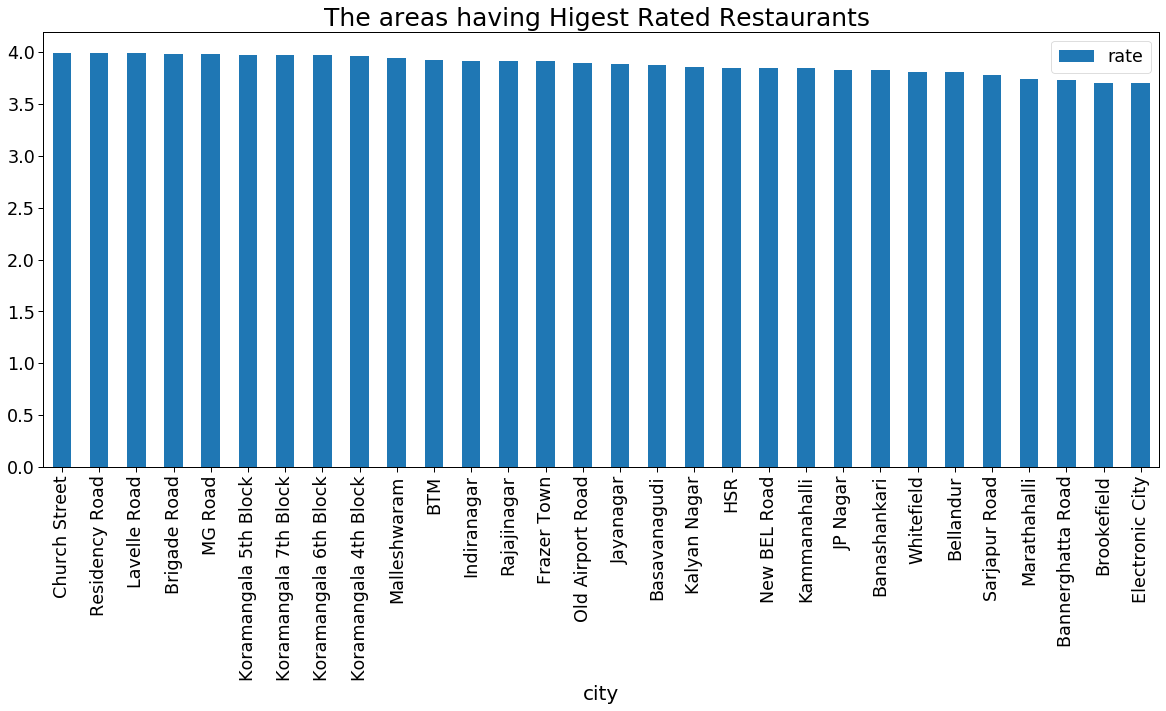

In [200]:
# plotting barplot for city vs rate
# to find out which city is high rated or least rated
zomato[['rate', 'city']].groupby(['city']).mean().sort_values("rate", ascending = False).plot.bar()
plt.title('The areas having Higest Rated Restaurants ')
plt.show()

In [202]:
Church Street  in Bangaluru has the Highest Average for Restaurant ratings

In [17]:
#lets delete the nulll values
dishes_data = zomato[zomato.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())
dishes_data.isnull().sum()



url                  0
address              0
name                 0
online_order         0
book_table           0
rate                30
votes                0
phone              339
location             0
rest_type           70
dish_liked           0
cuisines             0
average_cost       136
reviews_list         0
menu_item            0
listed_in(type)      0
listed_in(city)      0
dtype: int64

Text(0, 0.5, 'Count')

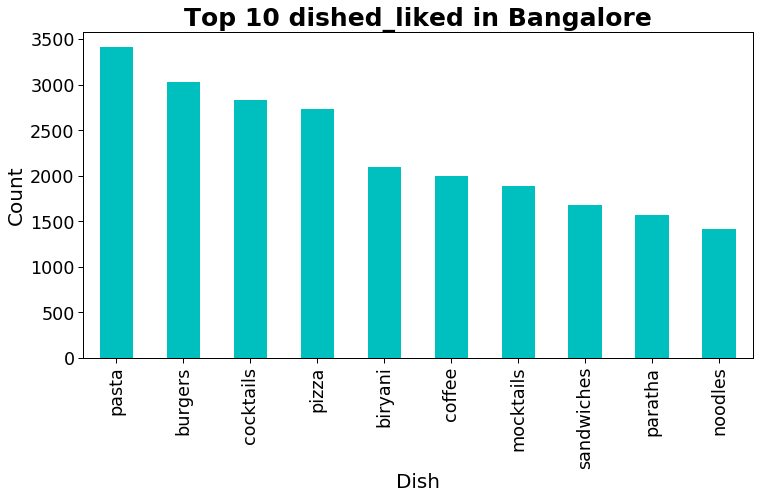

In [210]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

In [ ]:
Most liked food by Bangloreans is Pasta followed by Burgers and Cocktails 

3.9043825392692786


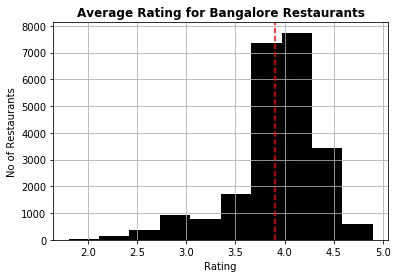

In [34]:
zomato['rate'] = zomato['rate'].replace('NEW',np.NaN)
zomato['rate'] = zomato['rate'].replace('-',np.NaN)
zomato.dropna(how = 'any', inplace = True)
zomato['rate'] = zomato.loc[:,'rate'].replace('[ ]','',regex = True)
zomato['rate'] = zomato['rate'].astype(str)
zomato['rate'] = zomato['rate'].apply(lambda r: r.replace('/5',''))
zomato['rate'] = zomato['rate'].apply(lambda r: float(r))
zomato.rate.hist(color='black')
plt.axvline(x= zomato.rate.mean(),ls='--',color='red')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(zomato.rate.mean())

In [ ]:
Theaverage rating for a Restaurant in Bangalore is 3.904

# Analysis for Cuisines 

Text(0, 0.5, 'No of restaurants')

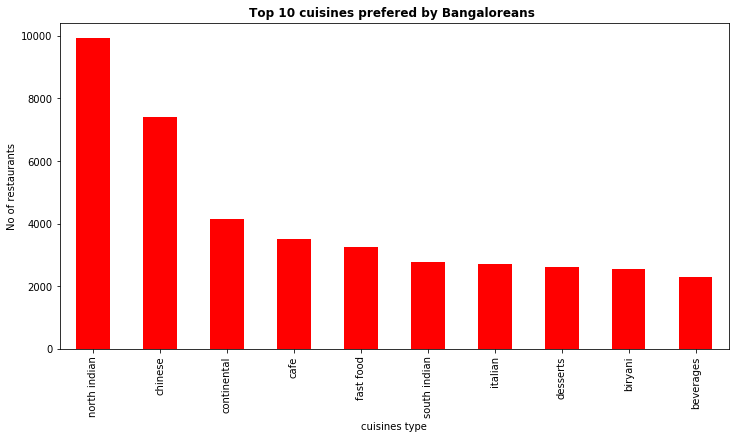

In [49]:
#lets delete the nulll values
cuisines_data = zomato[zomato.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines prefered by Bangaloreans ',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')



In [ ]:
Restaurants with North Indian Cuisine are the most Available by number count 

Text(0.5, 1.0, 'rate vs oline order')

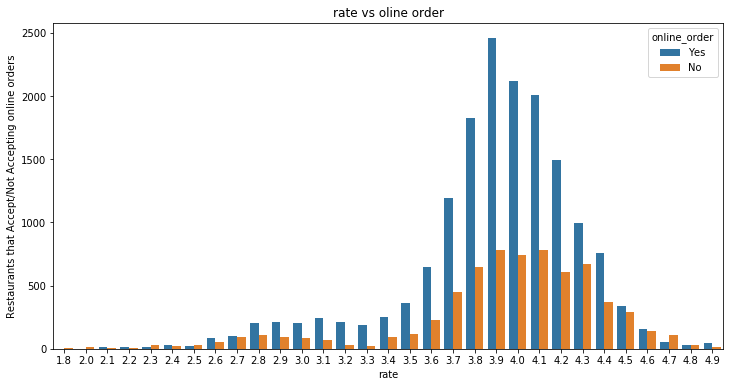

In [52]:
plt.figure(figsize = (12,6))
sns.countplot(x=zomato['rate'], hue = zomato['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order")

In [ ]:
As observed Ratings and Online orders have a Strong  Coorelation 

Text(0.5, 1.0, 'Average cost for 2 people ( In INR )')

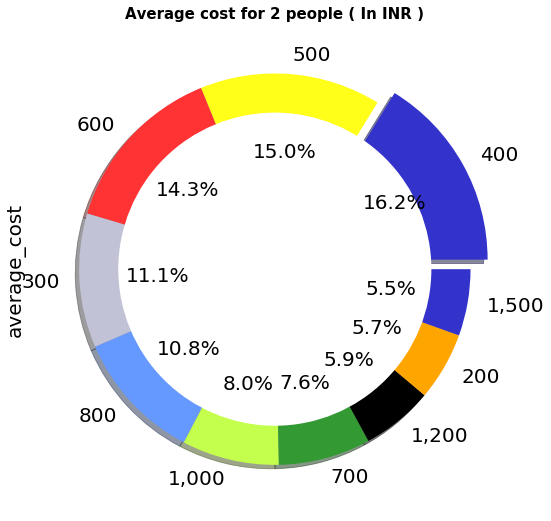

In [226]:
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933','black','orange']
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

Circ_plot  = zomato['average_cost'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people ( In INR )",fontsize = 15,weight = 'bold')

In [ ]:
On Average People most people (16.2%) spend 400 INR for 2 people 

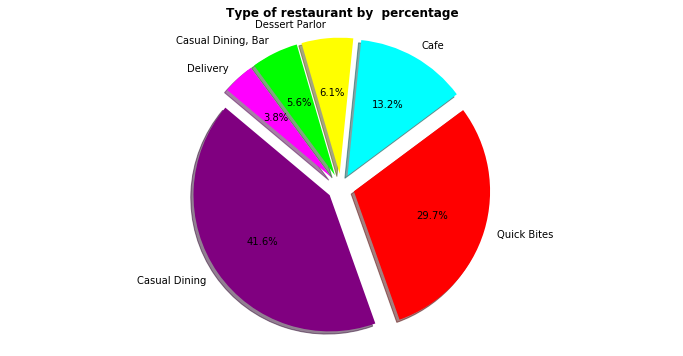

In [60]:
plt.figure(figsize = (12,6))
names = zomato['rest_type'].value_counts()[:6].index
values = zomato['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant by  percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
Most Restaurants Available are of Casual Dining Followed by Quick Bites (Fast Foods)

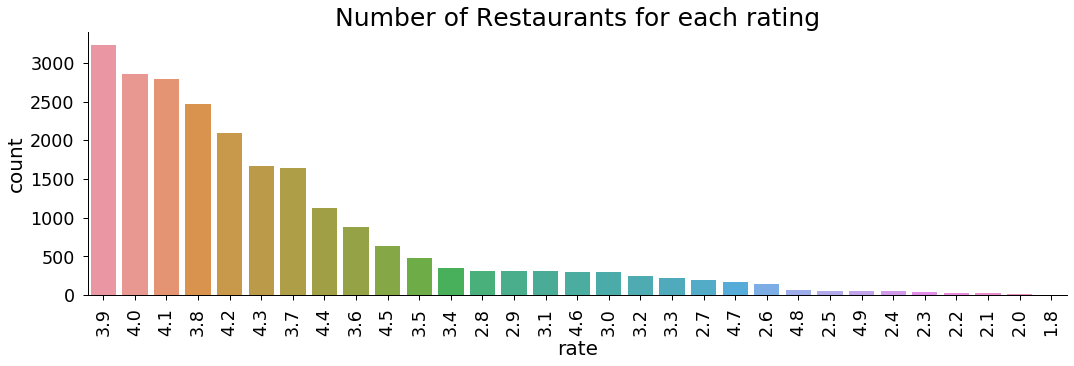

In [230]:
# Plotting the number of restaurants for each rating
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = zomato, kind = 'count', x = 'rate',aspect=3,  order = zomato['rate'].value_counts().index)
plt.title('Number of Restaurants for each rating')
b.set_xticklabels(rotation = 90)
plt.show()

In [ ]:
Most Restaurants have a Rating of 3.9 Qucikly Folowed by 4.0 and 4.1

Text(0.5, 1.0, ' Most Number of Restaurants Per Area  ')

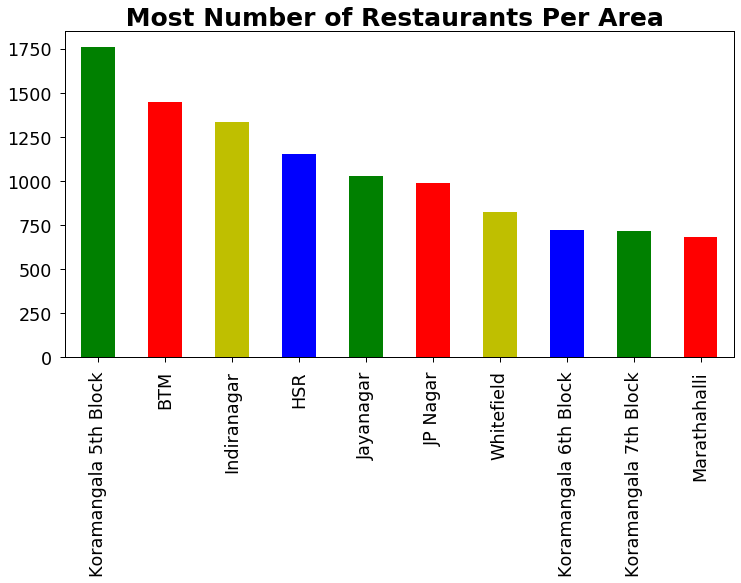

In [231]:
plt.figure(figsize = (12,6))
zomato['location'].value_counts()[:10].plot(kind = 'bar', color = ['g','r','y','b'])
plt.title(" Most Number of Restaurants Per Area  ", weight = 'bold')


In [ ]:
Koramangala Block has Most Number of Restaurants 

Text(0.5, 1.0, 'Restaurants with the Most Number of Branches ')

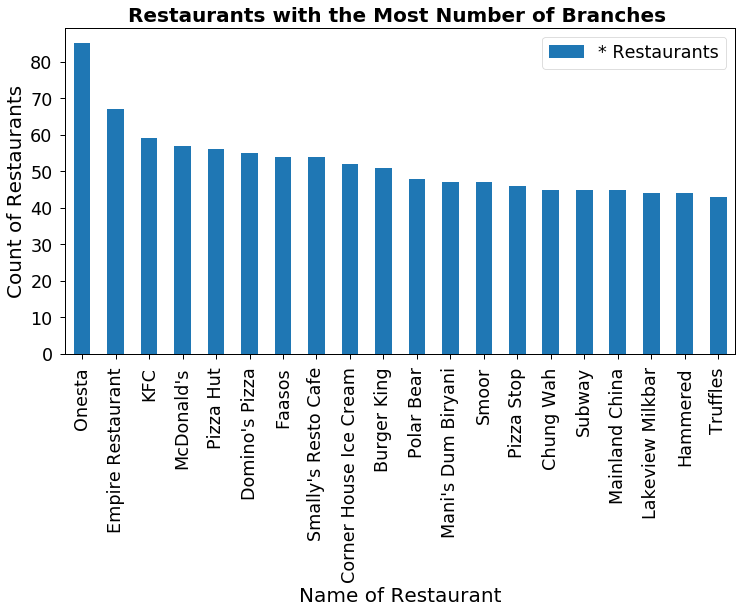

In [236]:
plt.figure(figsize = (12,6))
ax = zomato.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Restaurants with the Most Number of Branches ",fontsize =20, weight = 'bold')

In [39]:
# No of restaurants accepting online orders
zomato.online_order.value_counts()


Yes    30444
No     21273
Name: online_order, dtype: int64

Text(0.5, 0, 'online orders')

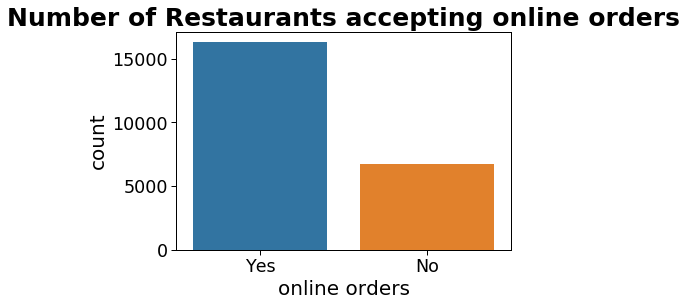

In [84]:
import seaborn as sns
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   

ax= sns.countplot(zomato['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

In [ ]:
15000+ Restaurants accept Online Orders 

In [42]:
# no of restaurants having open book table 
zomato['book_table'].value_counts()


No     45268
Yes     6449
Name: book_table, dtype: int64

Text(0, 0.5, 'No of restaurants')

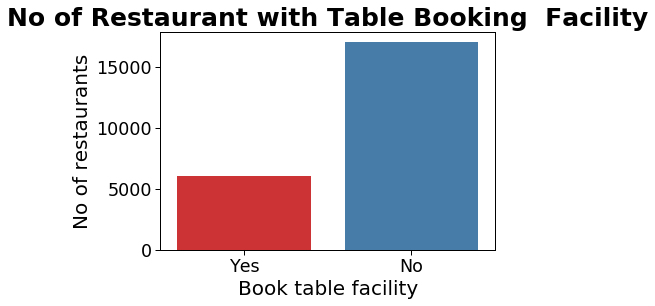

In [83]:

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.countplot(zomato['book_table'], palette= "Set1")
plt.title("No of Restaurant with Table Booking  Facility", weight = 'bold')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')

In [ ]:
Very Few Restaurants have table Booking Facility Compared to Delivering Online 

In [79]:

# rate feature
zomato['rate'].value_counts()
zomato['rate'].isnull().sum()

# Removing '/5' from rate column
zomato['rate'] = zomato['rate'].apply(lambda x: str(x).split('/')[0])

# renaming features 
zomato = zomato.rename(columns = {"approx_cost(for two people)" : "avg_cost", "listed_in(type)" : "meal_type", 
                   "listed_in(city)" : "city"})



<Figure size 1440x360 with 0 Axes>

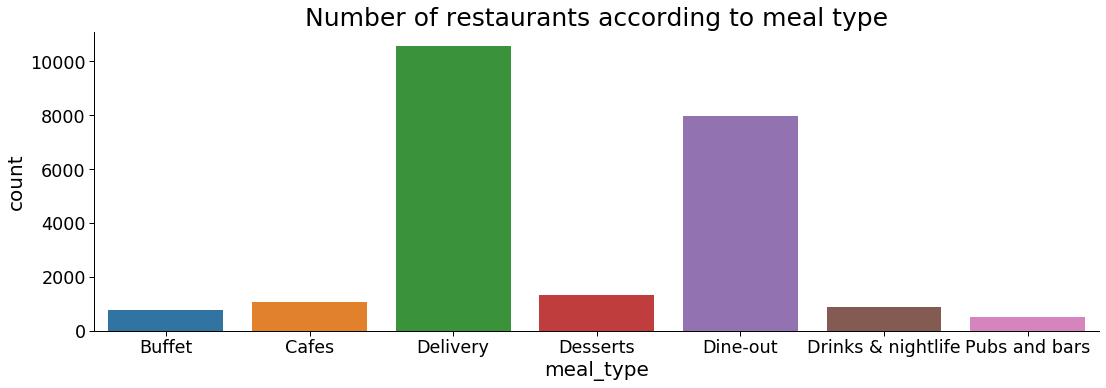

In [97]:
# plotting number of restaurants with meal type
plt.figure(figsize=(20,5))
sns.set_context("paper", font_scale = 2, rc = {"font.size": 5,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.catplot(data = zomato, kind = 'count', x = 'meal_type', aspect =3)
plt.title('Number of restaurants according to meal type')
plt.show()

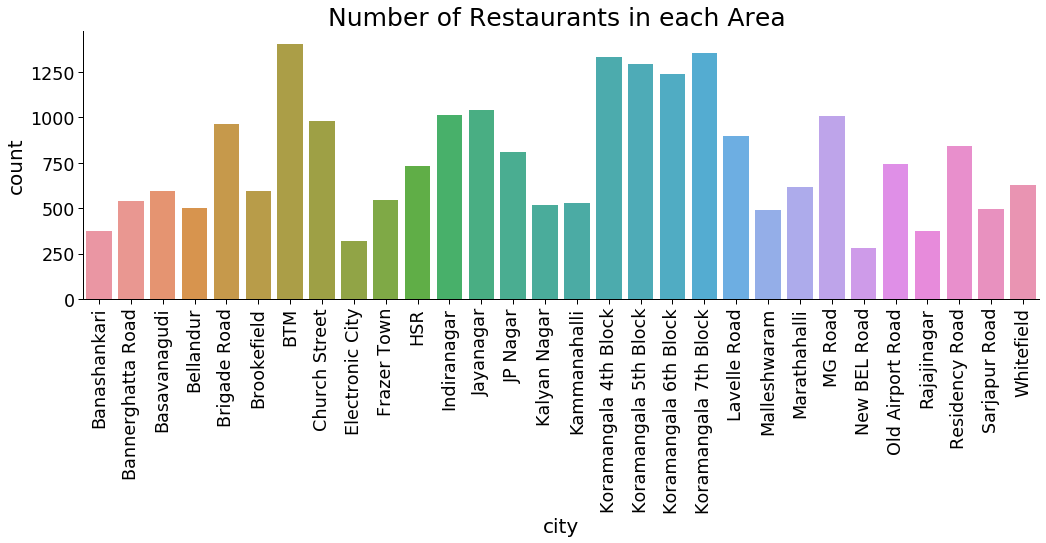

In [122]:

sns.set_context("paper", font_scale = 2, rc={"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = zomato, kind = 'count', x = 'city', aspect =3)
plt.title('Number of Restaurants in each Area ')
b.set_xticklabels(rotation = 90)
plt.show()


In [ ]:
Koramangala has the most number of Restaurants all Blocks Combined but BTM has the most Restaurants in an Area .  

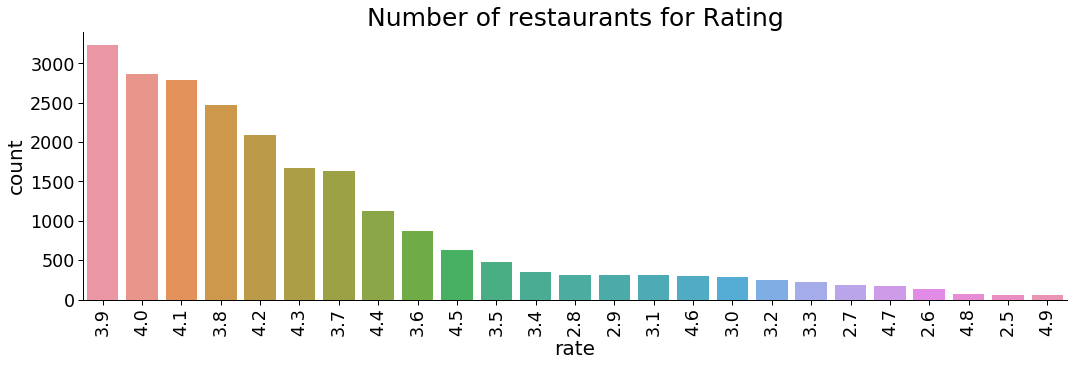

In [124]:
# tuning rate feature, converting '-' and 'NEW' to unrated
a = list(zomato['rate'])
for i in range(0, len(a)):
    if a[i] == 'nan':
        a[i] = 'unrated'
    elif a[i] == '-':
        a[i] = 'unrated'
    elif a[i] == 'NEW':
        a[i] = 'unrated'
        
zomato['rate'] = a

zomato['rate'].value_counts()

a = list(zomato['rate'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i] = None
    else :
        a[i] = float(a[i])
zomato['rate'] = a
# Plotting the number of restaurants for each rating
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = zomato, kind = 'count', x = 'rate', order = zomato['rate'].value_counts().head(25).index , aspect =3)
plt.title('Number of restaurants for Rating')
b.set_xticklabels(rotation = 90)
plt.show()


In [ ]:
Most Number of restaurants have a 3.9 Rating being Quickly Followed by 4.0 and 4.1

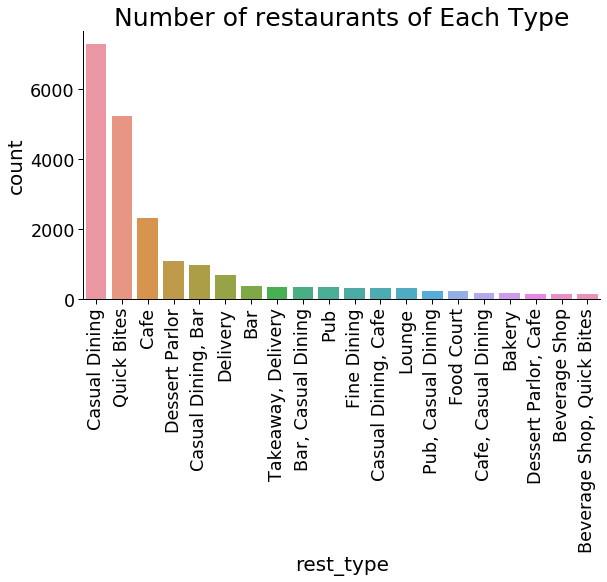

In [120]:
# Plotting count plot of rest_type
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = zomato, kind = 'count', aspect = 2 ,x = 'rest_type', order = zomato['rest_type'].value_counts().head(20).index)
plt.title('Number of restaurants of Each Type')
b.set_xticklabels(rotation = 90)
plt.show()

In [ ]:
Most Number Of Restaurants are Casual Dinings Followed by Quick Bites and Cafe's

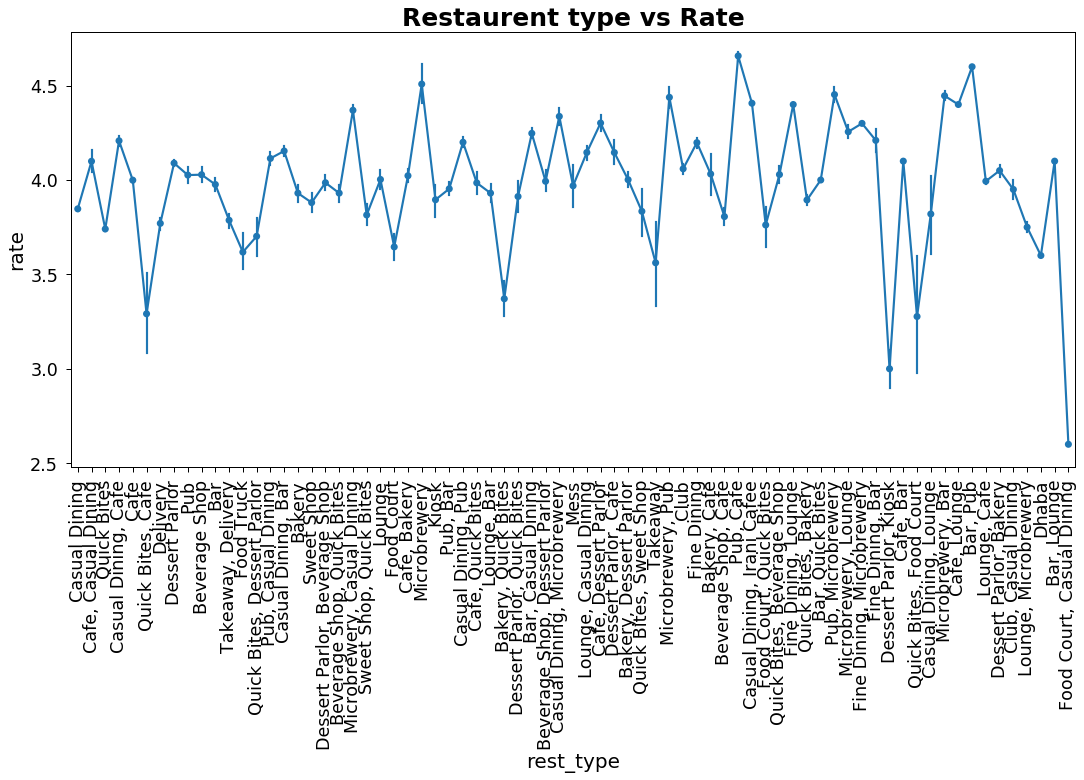

In [238]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=zomato["rest_type"], y=zomato["rate"], zomato=zomato)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()


In [ ]:
Pub and cafes are one of the most rated along with Microbreweries , while Food courts happen to be the least 

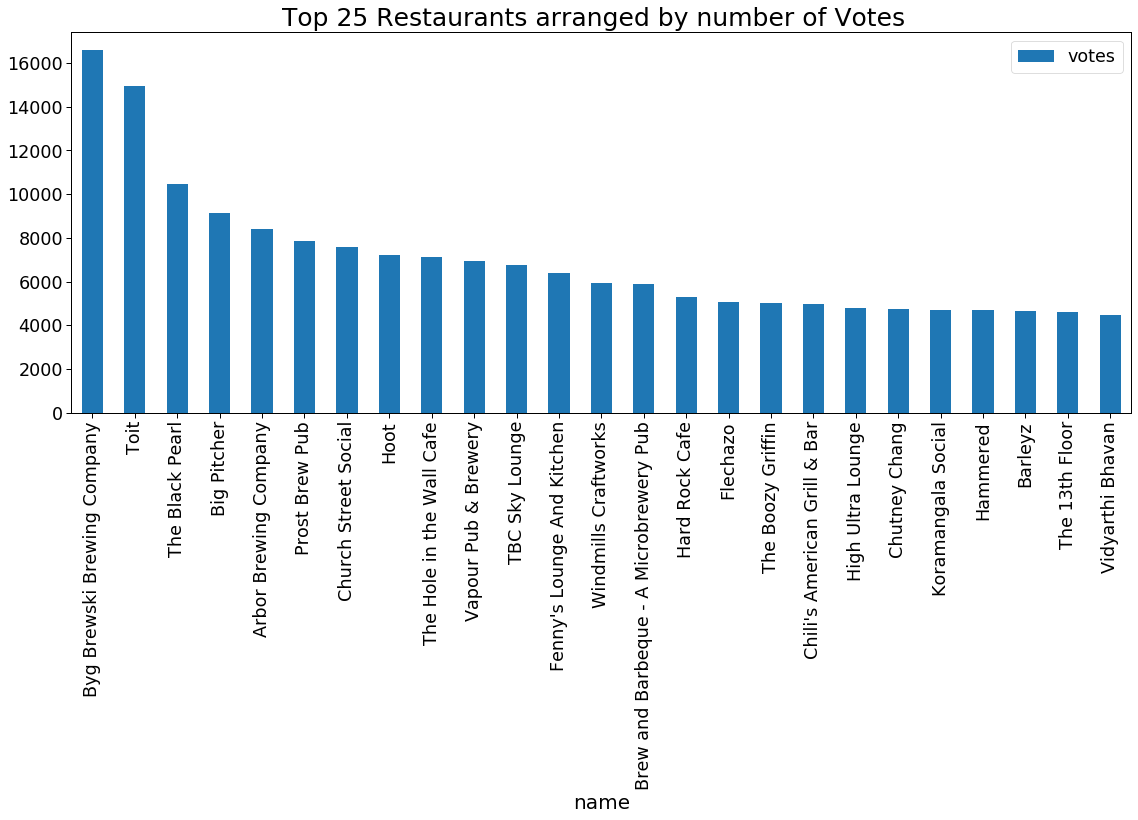

In [130]:
# Bar plot of first 25 restaurants as per votes
zomato[['votes', 'name']].groupby(['name']).median().sort_values("votes", ascending = False).head(25).plot.bar(figsize=(19,7))
plt.title('Top 25 Restaurants arranged by number of Votes given on Zomato  ')
plt.show()

In [ ]:
Byg Brewing Company has the Most Number of Votes  Given at 16000+

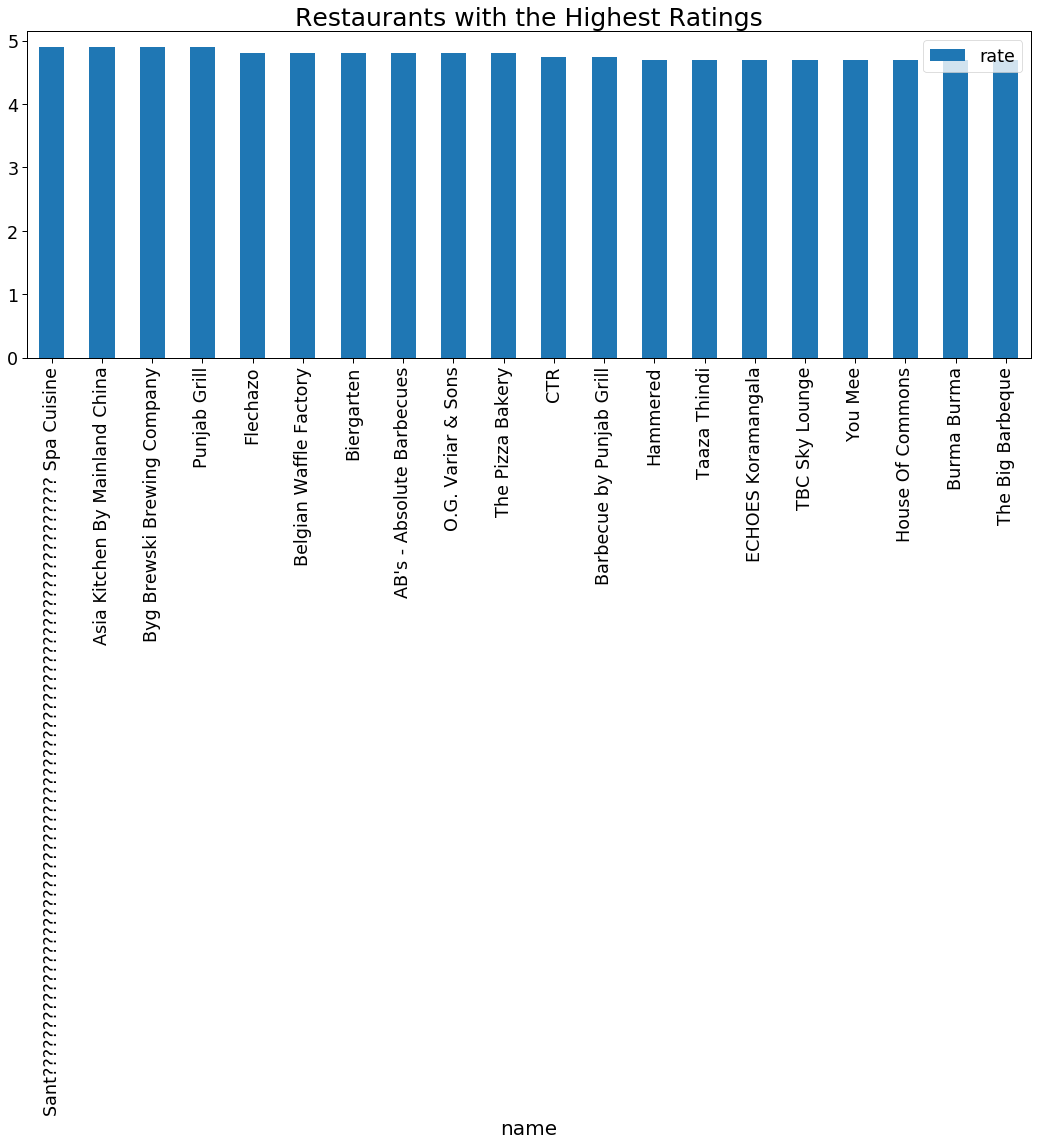

In [176]:

zomato[['rate', 'name']].groupby(['name']).median().sort_values("rate", ascending = False).head(20).plot.bar(figsize=(18,6))
plt.title(' Restaurants with the Highest Ratings ')
plt.show()

In [ ]:
The Restaurant Sante Spa Cuisine is one of the Highly Rated in Bangalore

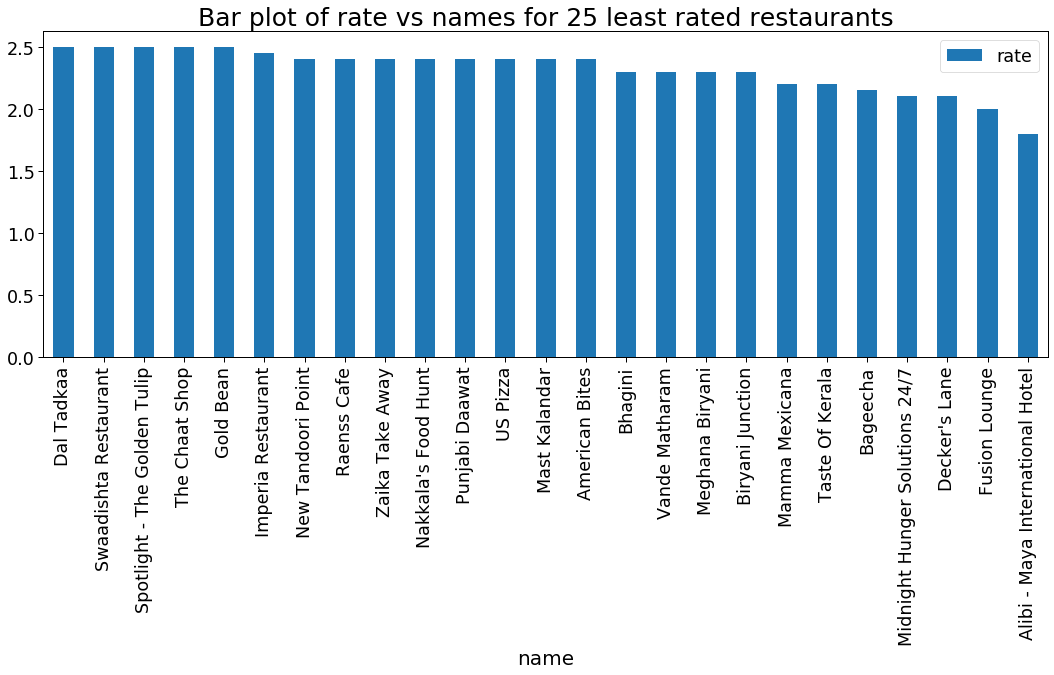

In [154]:
# bar plot of last 50 restaurants as per rate
#a = a[0: len(a)-1]
a = pd.DataFrame(zomato['rate'])
a['name'] = zomato['name']
a = a.dropna(axis = 0, how ='any')
a[['rate', 'name']].groupby(['name']).median().sort_values("rate", ascending = False).tail(25).plot.bar(figsize=(18,6))
plt.title('Bar plot of rate vs names for 25 least rated restaurants')
plt.show()

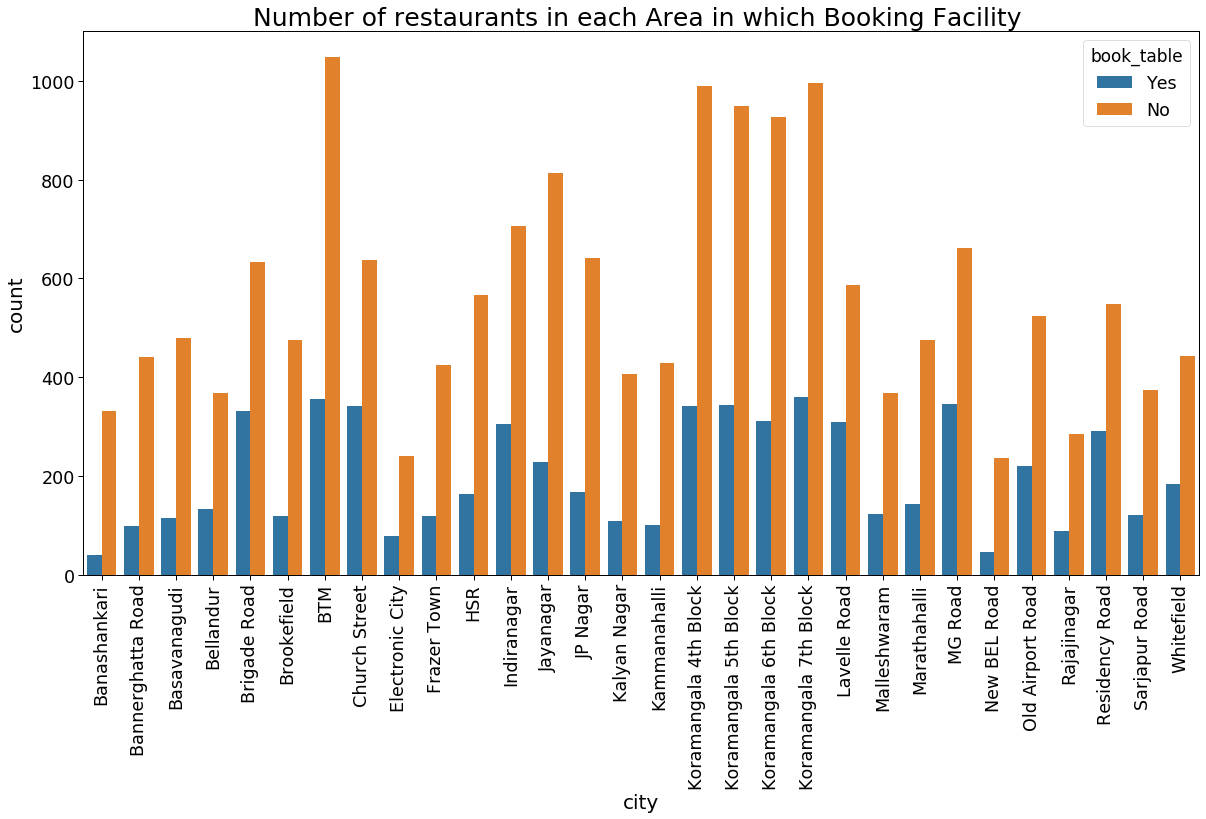

In [175]:

# count plot of restaurants per city with hue = book_table
plt.rcParams['figure.figsize']=20,10

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.countplot(data = zomato, x = 'city', hue = 'book_table')
plt.title('Number of restaurants in each Area in which Booking Facility ')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.show()


Text(0.5, 1.0, ' Ratings compared to online Order ')

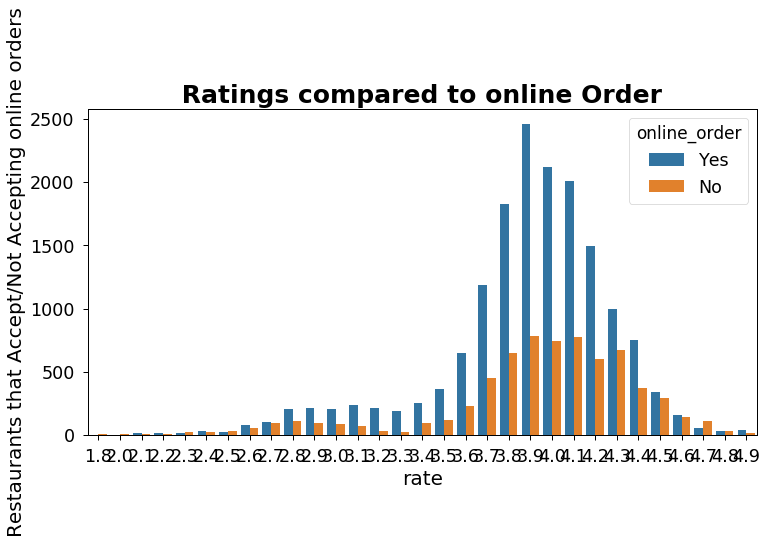

In [239]:
plt.rcParams['figure.figsize']=25,8

plt.figure(figsize = (12,6))
sns.countplot(x=zomato['rate'], hue = zomato['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title(" Ratings compared to online Order ",weight = 'bold')

#### As we can see there is a clear coorelation between ratings and online orders for a restaurant .

In [ ]:
Inferences:
30428 restaurants are accepting online orders
45268 restaurants do not have the book table feature. #### Restaurants:-
So we have 93 locations where the restaurants can be accessed through zomato in Bangalore.
We have highest number of restaurants in BTM . #### Restaurant types:-
The most preferred restaurant type in Banglore is - Quick Bites 
Cuisine:-
The most liked cuisine in Banglore is -North Indian
Average cost of Restaurant:
There are 7576 Restaurants with an average cost for two people of 300 rupees.
Dish liked:
The most Liked dish is Biryani 